#Banco de dados para as tabelas


In [ ]:
#Esta parte descreve a importação de bibliotecas e de arquivos do drive
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from google.colab import drive
drive.mount('/content/drive')
#Grade diária - Seg a Sex
data_seg_sex = pd.read_csv("/content/drive/Shareddrives/hefestos/CSV/Grade Diária Seg a Sex.csv", sep = ',')

#Grade diária - Sab
data_sabado = pd.read_csv("/content/drive/Shareddrives/hefestos/CSV/Grade Diária Sáb.csv", sep = ',')

#Grade diária - Dom
data_domingo = pd.read_csv("/content/drive/Shareddrives/hefestos/CSV/Grade Diária Dom.csv", sep = ',')

# --------------------------------------------- E M I S S O R A   1 ----------------------------------------------
#Tabela de Sábado Emissora 1
rat_sabado1 = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/TV Gazeta (GLO) - Sáb.csv",sep = ',')
#Tabela de Domingo Emissora 1
rat_domingo1 = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/TV Gazeta (GLO) - Dom.csv",sep = ',')
#Tabela de Seg a Sex Emissora 1
rat_seg_sex1 = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/TV Gazeta (GLO) - Seg a Sex.csv",sep = ',')


#---------------------------------------------- E M I S S O R A  2 -----------------------------------------------
#Tabela de Sábado Emissora 2
rat_sabado2 = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/TV Vitória (REC) - Sáb.csv",sep = ',')
#Tabela de Domingo Emissora 2
rat_domingo2 = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/TV Vitória (REC) - Dom.csv",sep = ',')
#Tabela de Seg a Sex Emissora 2
rat_seg_sex2 = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/TV Vitória (REC) - Seg a Sex.csv",sep = ',')

#------------------------------------------------- S T R E A M S ---------------------------------------------------
#Tabela de Sábado Streaming
rat_sabado_streaming = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/NI Conteúdo - Sáb.csv",sep = ',')
#Tabela de Domingo Streaming
rat_domingo_streaming = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/NI Conteúdo - Dom.csv",sep = ',')
#Tabela de Seg a Sex Streaming
rat_seg_sex_steaming = pd.read_csv("/content/drive/Shareddrives/hefestos/Anteriores/CSV/NI Conteúdo - Seg a Sex.csv",sep = ',')

#----------------------------------------------- F E R I A D O S -------------------------------------------------------
#Tabela de feriados
holiday = pd.read_csv("/content/drive/Shareddrives/hefestos/Sheets/Feriados.csv",sep = ',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Padronização



##Tabelas da Emissora 1

###Removendo colunas desnecessárias para o modelo - SEG a SEX

In [ ]:
#igualando duas colunas para unir-las
data_seg_sex['Faixa Horária'] = rat_seg_sex1['Hora Início']
#unindo as duas tabelas das quais uma corresponde a informacoes de quem assites e outra com estilo do programa; com base no horario e dia em que passa
new_merged_emissora = pd.merge(rat_seg_sex1, data_seg_sex,how='left',left_on=['Data','Hora Início'], right_on=['Data','Faixa Horária'])
#separa uma informacao em duas colunas para melhor leitura da tabela
new_merged_emissora[['Programa','Categoria']] = new_merged_emissora['TV Gazeta (GLO)'].str.split(' / ', expand=True)
#tira as colunas das quais nao vamos usar 
clean_merged_semana = new_merged_emissora.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0_y', 'Faixa Horária','TV Vitória (REC)','TV Tribuna (SBT)', 'TV Gazeta (GLO)', 'Emissora', 'Praça'], axis=1)
#retorna a tabela
clean_merged_semana

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria
0,0,2020-06-01,06:00:00,Segunda,4.27,2.40,0.31,0.82,5.23,1.65,2.35,0.0,0.00,0.00,3.19,1.98,5.81,1.61,BOM DIA ESPIRITO SANTO,JORNALISMO
1,1,2020-06-01,06:05:00,Segunda,4.89,3.02,0.51,1.08,5.23,1.89,2.75,0.0,0.00,0.00,3.19,2.86,5.81,2.38,BOM DIA ESPIRITO SANTO,JORNALISMO
2,2,2020-06-01,06:10:00,Segunda,5.74,3.13,1.53,1.22,5.23,1.97,3.24,0.0,1.22,0.00,3.19,3.52,5.81,2.62,BOM DIA ESPIRITO SANTO,JORNALISMO
3,3,2020-06-01,06:15:00,Segunda,6.55,3.06,1.86,1.48,6.46,1.92,3.92,0.0,1.52,0.00,3.19,4.05,6.65,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO
4,4,2020-06-01,06:20:00,Segunda,7.27,3.49,2.18,1.48,6.46,2.23,4.05,0.0,1.52,0.00,3.19,4.82,6.90,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156667,156667,2022-06-30,29:35:00,Quinta,1.67,0.30,0.41,1.03,0.53,0.17,0.92,0.0,0.96,0.25,0.00,1.41,0.00,0.71,HORA UM,JORNALISMO
156668,156668,2022-06-30,29:40:00,Quinta,1.97,0.30,0.41,1.45,0.35,0.17,1.07,0.0,0.96,1.25,0.00,1.41,0.00,0.47,HORA UM,JORNALISMO
156669,156669,2022-06-30,29:45:00,Quinta,2.22,0.30,0.41,1.45,0.88,0.17,1.26,0.0,0.96,1.25,0.00,1.41,0.00,1.18,HORA UM,JORNALISMO
156670,156670,2022-06-30,29:50:00,Quinta,2.71,0.54,0.41,1.81,0.88,0.37,1.42,0.0,0.96,1.25,0.00,1.74,0.00,1.88,HORA UM,JORNALISMO


###Removendo as colunas desnecessárias para o modelo - SAB

In [ ]:
#igualando duas colunas para unir-las
data_sabado['Faixa Horária'] = rat_sabado1['Hora Início']
#unindo as duas tabelas das quais uma corresponde a informacoes de quem assites e outra com estilo do programa; com base no horario e dia em que passa
new_merged_emissora1= pd.merge(rat_sabado1, data_sabado,how='left',left_on=['Data','Hora Início'], right_on=['Data','Faixa Horária'])
#separa uma informacao em duas colunas para melhor leitura da tabela
new_merged_emissora1[['Programa','Categoria']] = new_merged_emissora1['TV Gazeta (GLO)'].str.split(' / ', expand=True)
#tira as colunas das quais nao vamos usar 
clean_merged_sabado = new_merged_emissora1.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0_y', 'Faixa Horária','TV Vitória (REC)','TV Tribuna (SBT)', 'TV Gazeta (GLO)', 'Emissora', 'Praça'], axis=1)
#retorna a tabela
clean_merged_sabado

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria
0,0,2020-06-06,06:00:00,Sábado,3.01,0.48,0.0,2.45,2.93,0.47,2.11,0.0,0.0,1.53,2.06,1.86,1.64,1.17,COMO SERA,EDUCATIVO
1,1,2020-06-06,06:05:00,Sábado,3.01,0.48,0.0,2.45,2.93,0.47,2.11,0.0,0.0,1.53,2.06,1.86,1.64,1.17,COMO SERA,EDUCATIVO
2,2,2020-06-06,06:10:00,Sábado,3.01,0.48,0.0,2.45,2.93,0.47,2.11,0.0,0.0,1.53,2.06,1.86,1.64,1.17,COMO SERA,EDUCATIVO
3,3,2020-06-06,06:15:00,Sábado,3.55,0.48,0.0,2.19,5.23,0.75,2.50,0.0,0.0,1.53,2.28,2.42,2.89,1.17,COMO SERA,EDUCATIVO
4,4,2020-06-06,06:20:00,Sábado,2.92,0.80,0.0,1.80,3.57,0.57,2.12,0.0,0.0,2.54,1.21,1.29,3.21,1.17,COMO SERA,EDUCATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31099,31099,2022-06-25,29:35:00,Sábado,3.82,0.53,0.0,3.67,1.53,1.66,1.24,0.0,0.0,0.00,2.34,1.48,0.59,4.42,CORUJAO,FILME
31100,31100,2022-06-25,29:40:00,Sábado,3.51,0.53,0.0,2.76,1.53,1.15,1.24,0.0,0.0,0.00,1.46,1.48,0.59,3.73,CORUJAO,FILME
31101,31101,2022-06-25,29:45:00,Sábado,3.68,0.53,0.0,2.76,1.89,1.15,1.37,0.0,0.0,0.00,1.46,1.48,0.59,4.21,CORUJAO,FILME
31102,31102,2022-06-25,29:50:00,Sábado,3.94,0.53,0.0,2.76,2.42,1.15,1.56,0.0,0.0,0.00,1.46,1.48,0.59,4.93,CORUJAO,FILME


###Removendo as colunas desnecessárias para o modelo - DOM

In [ ]:
#Igualando duas colunas para uni-las
data_domingo['Faixa Horária'] = rat_domingo1['Hora Início']
#Unindo as duas tabelas das quais uma corresponde a informacoes de quem assites e outra com estilo do programa; com base no horario e dia em que passa
new_merged_emissora = pd.merge(rat_domingo1, data_domingo,how='left',left_on=['Data','Hora Início'], right_on=['Data','Faixa Horária'])
#separa uma informacao em duas colunas para melhor leitura da tabela
new_merged_emissora[['Programa','Categoria']] = new_merged_emissora['TV Gazeta (GLO)'].str.split(' / ', expand=True)
#tira as colunas das quais nao vamos usar 
clean_merged_domingo = new_merged_emissora.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0_y', 'Faixa Horária','TV Vitória (REC)','TV Tribuna (SBT)', 'TV Gazeta (GLO)', 'Emissora', 'Praça'], axis=1)

#retorna a tabela
clean_merged_domingo

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria
0,0,2020-06-07,06:00:00,Domingo,4.79,2.27,1.24,0.97,4.75,1.06,3.10,0.0,0.00,1.57,2.07,3.65,1.92,3.38,CORUJAO CONT,FILME
1,1,2020-06-07,06:05:00,Domingo,5.10,2.28,1.24,1.44,4.75,1.28,3.14,0.0,0.00,1.57,2.07,3.65,2.85,3.40,CORUJAO CONT,FILME
2,2,2020-06-07,06:10:00,Domingo,4.61,1.76,1.24,1.44,4.75,1.06,3.02,0.0,0.00,1.57,2.07,3.65,2.85,2.24,CORUJAO CONT,FILME
3,3,2020-06-07,06:15:00,Domingo,5.47,2.14,1.92,1.56,4.75,1.71,3.02,0.0,0.00,1.57,2.26,4.28,3.79,2.24,CORUJAO CONT,FILME
4,4,2020-06-07,06:20:00,Domingo,6.41,2.07,2.08,3.06,5.36,2.43,3.36,0.0,0.00,1.57,3.24,4.43,4.16,4.08,CORUJAO CONT,FILME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31099,31099,2022-06-26,29:35:00,Domingo,3.37,1.42,0.00,2.06,0.89,0.63,1.73,0.0,0.00,0.00,0.00,2.50,1.53,2.97,HORA UM,JORNALISMO
31100,31100,2022-06-26,29:40:00,Domingo,3.31,1.42,0.00,1.93,0.89,0.80,1.51,0.0,0.00,0.00,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO
31101,31101,2022-06-26,29:45:00,Domingo,3.62,1.90,0.00,2.29,0.89,1.14,1.69,0.0,0.00,2.31,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO
31102,31102,2022-06-26,29:50:00,Domingo,4.02,1.78,0.52,2.53,0.89,1.28,1.82,0.0,0.00,2.51,0.62,2.50,2.23,2.15,HORA UM,JORNALISMO


##Mesclar todas as tabelas da emissora 1

In [ ]:
#Junta a tabela da semana(seg a sex), do sabado e de domingo
clean_merged = pd.concat([clean_merged_semana,clean_merged_sabado,clean_merged_domingo])
#faz com que todos os dados da coluna data sejam convertidos para datetime um tipo de variavel proprio do pandas
clean_merged['Data'] = pd.to_datetime(clean_merged['Data']).dt.date
clean_merged.drop_duplicates(inplace=True)
clean_merged.sort_values(by=['Data','Hora Início'], ascending=True)


,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria
0,0,2020-06-01,06:00:00,Segunda,4.27,2.40,0.31,0.82,5.23,1.65,2.35,0.0,0.00,0.00,3.19,1.98,5.81,1.61,BOM DIA ESPIRITO SANTO,JORNALISMO
1,1,2020-06-01,06:05:00,Segunda,4.89,3.02,0.51,1.08,5.23,1.89,2.75,0.0,0.00,0.00,3.19,2.86,5.81,2.38,BOM DIA ESPIRITO SANTO,JORNALISMO
2,2,2020-06-01,06:10:00,Segunda,5.74,3.13,1.53,1.22,5.23,1.97,3.24,0.0,1.22,0.00,3.19,3.52,5.81,2.62,BOM DIA ESPIRITO SANTO,JORNALISMO
3,3,2020-06-01,06:15:00,Segunda,6.55,3.06,1.86,1.48,6.46,1.92,3.92,0.0,1.52,0.00,3.19,4.05,6.65,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO
4,4,2020-06-01,06:20:00,Segunda,7.27,3.49,2.18,1.48,6.46,2.23,4.05,0.0,1.52,0.00,3.19,4.82,6.90,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156667,156667,2022-06-30,29:35:00,Quinta,1.67,0.30,0.41,1.03,0.53,0.17,0.92,0.0,0.96,0.25,0.00,1.41,0.00,0.71,HORA UM,JORNALISMO
156668,156668,2022-06-30,29:40:00,Quinta,1.97,0.30,0.41,1.45,0.35,0.17,1.07,0.0,0.96,1.25,0.00,1.41,0.00,0.47,HORA UM,JORNALISMO
156669,156669,2022-06-30,29:45:00,Quinta,2.22,0.30,0.41,1.45,0.88,0.17,1.26,0.0,0.96,1.25,0.00,1.41,0.00,1.18,HORA UM,JORNALISMO
156670,156670,2022-06-30,29:50:00,Quinta,2.71,0.54,0.41,1.81,0.88,0.37,1.42,0.0,0.96,1.25,0.00,1.74,0.00,1.88,HORA UM,JORNALISMO


##Feriados

In [ ]:
holiday

,Data,Feriado,Ano
0,2019-01-01,Confraternização Universal,2019
1,2019-04-03,Carnaval,2019
2,2019-05-03,Carnaval,2019
3,2019-04-19,Paixão de Cristo,2019
4,2019-04-21,Tiradentes,2019
...,...,...,...
1061,2100-07-09,Independência,2100
1062,2100-12-10,Nossa Senhora Aparecida,2100
1063,2100-02-11,Finados,2100
1064,2100-11-15,Proclamação da República,2100


In [ ]:
#Adicionando feriados
holiday['Data'] = pd.to_datetime(holiday['Data']).dt.date
clean_merged = pd.merge(clean_merged, holiday,how='left',left_on=['Data'], right_on=['Data'])
clean_merged

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria,Feriado,Ano
0,0,2020-06-01,06:00:00,Segunda,4.27,2.40,0.31,0.82,5.23,1.65,...,0.00,0.00,3.19,1.98,5.81,1.61,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,NaN
1,1,2020-06-01,06:05:00,Segunda,4.89,3.02,0.51,1.08,5.23,1.89,...,0.00,0.00,3.19,2.86,5.81,2.38,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,NaN
2,2,2020-06-01,06:10:00,Segunda,5.74,3.13,1.53,1.22,5.23,1.97,...,1.22,0.00,3.19,3.52,5.81,2.62,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,NaN
3,3,2020-06-01,06:15:00,Segunda,6.55,3.06,1.86,1.48,6.46,1.92,...,1.52,0.00,3.19,4.05,6.65,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,NaN
4,4,2020-06-01,06:20:00,Segunda,7.27,3.49,2.18,1.48,6.46,2.23,...,1.52,0.00,3.19,4.82,6.90,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218875,31099,2022-06-26,29:35:00,Domingo,3.37,1.42,0.00,2.06,0.89,0.63,...,0.00,0.00,0.00,2.50,1.53,2.97,HORA UM,JORNALISMO,NaN,NaN
218876,31100,2022-06-26,29:40:00,Domingo,3.31,1.42,0.00,1.93,0.89,0.80,...,0.00,0.00,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,NaN
218877,31101,2022-06-26,29:45:00,Domingo,3.62,1.90,0.00,2.29,0.89,1.14,...,0.00,2.31,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,NaN
218878,31102,2022-06-26,29:50:00,Domingo,4.02,1.78,0.52,2.53,0.89,1.28,...,0.00,2.51,0.62,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,NaN


##Alterando medidas de tempo

In [ ]:
#Separa a coluna data em 3 colunas "Ano, mes e dia"
clean_merged['Dia'] = pd.to_datetime(clean_merged['Data']).dt.strftime('%d')
clean_merged['Mes'] = pd.to_datetime(clean_merged['Data']).dt.strftime('%m')
clean_merged['Ano'] = pd.to_datetime(clean_merged['Data']).dt.strftime('%Y')
clean_merged

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria,Feriado,Ano,Dia,Mes
0,0,2020-06-01,06:00:00,Segunda,4.27,2.40,0.31,0.82,5.23,1.65,...,3.19,1.98,5.81,1.61,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
1,1,2020-06-01,06:05:00,Segunda,4.89,3.02,0.51,1.08,5.23,1.89,...,3.19,2.86,5.81,2.38,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
2,2,2020-06-01,06:10:00,Segunda,5.74,3.13,1.53,1.22,5.23,1.97,...,3.19,3.52,5.81,2.62,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
3,3,2020-06-01,06:15:00,Segunda,6.55,3.06,1.86,1.48,6.46,1.92,...,3.19,4.05,6.65,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
4,4,2020-06-01,06:20:00,Segunda,7.27,3.49,2.18,1.48,6.46,2.23,...,3.19,4.82,6.90,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218875,31099,2022-06-26,29:35:00,Domingo,3.37,1.42,0.00,2.06,0.89,0.63,...,0.00,2.50,1.53,2.97,HORA UM,JORNALISMO,NaN,2022,26,06
218876,31100,2022-06-26,29:40:00,Domingo,3.31,1.42,0.00,1.93,0.89,0.80,...,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,2022,26,06
218877,31101,2022-06-26,29:45:00,Domingo,3.62,1.90,0.00,2.29,0.89,1.14,...,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,2022,26,06
218878,31102,2022-06-26,29:50:00,Domingo,4.02,1.78,0.52,2.53,0.89,1.28,...,0.62,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,2022,26,06




##Tabelas da Emissora 2

In [ ]:
#igualando duas colunas para unir-las
data_sabado['Faixa Horária'] = rat_sabado2['Hora Início']
#unindo as duas tabelas das quais uma corresponde a informacoes de quem assites e outra com estilo do programa; com base no horario e dia em que passa
new_merged_emissora2 = pd.merge(rat_sabado2, data_sabado,how='left',left_on=['Data','Hora Início'], right_on=['Data','Faixa Horária'])
#separa uma informacao em duas colunas para melhor leitura da tabela
new_merged_emissora2[['Programa','Categoria']] = new_merged_emissora2['TV Vitória (REC)'].str.split(' / ', expand=True)
#Separa a coluna data em 3 colunas "Ano, mes e dia"
new_merged_emissora2[['Ano','Mês','Dia']] = new_merged_emissora2['Data'].str.split('-', expand=True)
#tira as colunas das quais nao vamos usar 
clean_merged_sabado2 = new_merged_emissora2.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0_y', 'Faixa Horária','TV Vitória (REC)','TV Tribuna (SBT)', 'TV Gazeta (GLO)', 'Emissora', 'Praça'], axis=1)
#retorna a tabela
clean_merged_sabado2 

In [ ]:
#igualando duas colunas para unir-las
data_domingo['Faixa Horária'] = rat_domingo2['Hora Início']
#unindo as duas tabelas das quais uma corresponde a informacoes de quem assites e outra com estilo do programa; com base no horario e dia em que passa
new_merged_emissora2 = pd.merge(rat_domingo2, data_domingo,how='left',left_on=['Data','Hora Início'], right_on=['Data','Faixa Horária'])
#separa uma informacao em duas colunas para melhor leitura da tabela
new_merged_emissora2[['Programa','Categoria']] = new_merged_emissora2['TV Vitória (REC)'].str.split(' / ', expand=True)
#Separa a coluna data em 3 colunas "Ano, mes e dia"
new_merged_emissora2[['Ano','Mês','Dia']] = new_merged_emissora2['Data'].str.split('-', expand=True)
#tira as colunas das quais nao vamos usar 
clean_merged_domingo2 = new_merged_emissora2.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0_y', 'Faixa Horária','TV Vitória (REC)','TV Tribuna (SBT)', 'TV Gazeta (GLO)', 'Emissora', 'Praça'], axis=1)

#retorna a tabela
clean_merged_domingo2

In [ ]:
#igualando duas colunas para unir-las
data_seg_sex['Faixa Horária'] = rat_seg_sex2['Hora Início']
#unindo as duas tabelas das quais uma corresponde a informacoes de quem assites e outra com estilo do programa; com base no horario e dia em que passa
new_merged_emissora2 = pd.merge(rat_seg_sex2, data_seg_sex,how='left',left_on=['Data','Hora Início'], right_on=['Data','Faixa Horária'])
#separa uma informacao em duas colunas para melhor leitura da tabela
new_merged_emissora2[['Programa','Categoria']] = new_merged_emissora2['TV Vitória (REC)'].str.split(' / ', expand=True)
#Separa a coluna data em 3 colunas "Ano, mes e dia"
new_merged_emissora2[['Ano','Mês','Dia']] = new_merged_emissora2['Data'].str.split('-', expand=True)
#tira as colunas das quais nao vamos usar 
clean_merged_semana2 = new_merged_emissora2.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0_y', 'Faixa Horária','TV Vitória (REC)','TV Tribuna (SBT)', 'TV Gazeta (GLO)', 'Emissora', 'Praça'], axis=1)
#retorna a tabela
clean_merged_semana2

In [ ]:
#Junta a tabela da semana(seg a sex), do sabado e de domingo
clean_merged2 = pd.concat([clean_merged_semana2,clean_merged_sabado2,clean_merged_domingo2])
#faz com que todos os dados da coluna data sejam convertidos para datetime um tipo de variavel proprio do pandas
clean_merged2['Data'] = clean_merged2['Data'].apply(pd.to_datetime)
#
clean_merged2.drop_duplicates(inplace=True)
#
clean_merged2.sort_values(by=['Data','Hora Início'], ascending=True)


##Tabelas de Streaming


In [ ]:

#Separa a coluna data em 3 colunas "Ano, mes e dia"
rat_sabado_streaming[['Ano','Mês','Dia']] = rat_sabado_streaming['Data'].str.split('-', expand=True)
#tira as colunas das quais nao vamos usar 
clean_sabado_streaming = rat_sabado_streaming.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0',  'Emissora', ], axis=1)
#retorna a tabela
clean_sabado_streaming

In [ ]:

#Separa a coluna data em 3 colunas "Ano, mes e dia"
rat_domingo_streaming[['Ano','Mês','Dia']] = rat_domingo_streaming['Data'].str.split('-', expand=True)
#tira as colunas das quais nao vamos usar 
clean_domingo_streaming = rat_domingo_streaming.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0',  'Emissora', ], axis=1)
#retorna a tabela
clean_domingo_streaming

In [ ]:

#Separa a coluna data em 3 colunas "Ano, mes e dia"
rat_seg_sex_steaming[['Ano','Mês','Dia']] = rat_seg_sex_steaming['Data'].str.split('-', expand=True)
#tira as colunas das quais nao vamos usar 
clean_seg_sex_streaming = rat_seg_sex_steaming.drop(['Total Domicílios | Shr%','AB | Shr%', 'C1 | Shr%', 'C2 | Shr%', 'DE | Shr%', 'Masculino | Shr%',
       'Feminino | Shr%', '4-11 anos | Shr%', '12-17 anos | Shr%',
       '18-24 anos | Shr%', '25-34 anos | Shr%', '35-49 anos | Shr%',
       '50-59 anos | Shr%', '60+ anos | Shr%', 'Total Indivíduos | Rch%',
       'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%', 'DE | Rch%', 'Masculino | Rch%',
       'Feminino | Rch%', '4-11 anos | Rch%', '12-17 anos | Rch%',
       '18-24 anos | Rch%', '25-34 anos | Rch%', '35-49 anos | Rch%',
       '50-59 anos | Rch%', '60+ anos | Rch%', 'Total Indivíduos | Fid%',
       'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%', 'DE | Fid%', 'Masculino | Fid%',
       'Feminino | Fid%', '4-11 anos | Fid%', '12-17 anos | Fid%',
       '18-24 anos | Fid%', '25-34 anos | Fid%', '35-49 anos | Fid%',
       '50-59 anos | Fid%', '60+ anos | Fid%', 'Unnamed: 0',  'Emissora', ], axis=1)
#retorna a tabela
clean_seg_sex_streaming

In [ ]:
#Junta a tabela da semana(seg a sex), do sabado e de domingo
clean_merged3 = pd.concat([clean_seg_sex_streaming,clean_sabado_streaming,clean_domingo_streaming])
#faz com que todos os dados da coluna data sejam convertidos para datetime um tipo de variavel proprio do pandas
clean_merged3['Data'] = clean_merged3['Data'].apply(pd.to_datetime)
#
clean_merged3.drop_duplicates(inplace=True)
#
clean_merged3.sort_values(by=['Data','Hora Início'], ascending=True)

NameError: ignored

In [ ]:
#convertendo hora - inteiro

clean_merged[['hora','minuto','segundo']]= clean_merged['Hora Início'].str.split(':', expand=True)
clean_merged['minuto']= clean_merged['minuto'].apply(lambda x: int(x)/60)
clean_merged['hora'] = clean_merged['hora'].apply(lambda x: int(x))
clean_merged['Hora Início'] = clean_merged.loc[:,['hora','minuto']].sum(axis=1)
clean_merged = clean_merged.drop(['hora','minuto','segundo'], axis=1)
clean_merged

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria,Feriado,Ano,Dia,Mes
0,0,2020-06-01,6.000000,Segunda,4.27,2.40,0.31,0.82,5.23,1.65,...,3.19,1.98,5.81,1.61,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
1,1,2020-06-01,6.083333,Segunda,4.89,3.02,0.51,1.08,5.23,1.89,...,3.19,2.86,5.81,2.38,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
2,2,2020-06-01,6.166667,Segunda,5.74,3.13,1.53,1.22,5.23,1.97,...,3.19,3.52,5.81,2.62,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
3,3,2020-06-01,6.250000,Segunda,6.55,3.06,1.86,1.48,6.46,1.92,...,3.19,4.05,6.65,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
4,4,2020-06-01,6.333333,Segunda,7.27,3.49,2.18,1.48,6.46,2.23,...,3.19,4.82,6.90,3.10,BOM DIA ESPIRITO SANTO,JORNALISMO,NaN,2020,01,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218875,31099,2022-06-26,29.583333,Domingo,3.37,1.42,0.00,2.06,0.89,0.63,...,0.00,2.50,1.53,2.97,HORA UM,JORNALISMO,NaN,2022,26,06
218876,31100,2022-06-26,29.666667,Domingo,3.31,1.42,0.00,1.93,0.89,0.80,...,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,2022,26,06
218877,31101,2022-06-26,29.750000,Domingo,3.62,1.90,0.00,2.29,0.89,1.14,...,0.00,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,2022,26,06
218878,31102,2022-06-26,29.833333,Domingo,4.02,1.78,0.52,2.53,0.89,1.28,...,0.62,2.50,2.23,2.15,HORA UM,JORNALISMO,NaN,2022,26,06


##Categorias e programas

In [ ]:
#dicionario para podermos manipular os dados da coluna categoria no pandas 
dict_categoria = {'JORNALISMO' : 14, 'AUDITORIO' : 1, 'FILME' : 10, 'NOVELA' : 18, 'SERIES' : 27,
       'ENTREVISTA' : 7, 'REALITY SHOW' : 22, 'HUMORISTICO' : 13, 'REPORTAGEM' : 25,
       'EDUCATIVO' : 6, 'DOCUMENTARIO' : 5, 'FUTEBOL' : 11, 'ESPORTE' : 8, 'POLITICO' : 20,
       'SHOW' : 28, 'FEMININO' : 9, 'DEBATE' : 4, 'MUSICAL' : 16, 'RELIGIOSO' : 24, 'SORTEIO' : 29,
       'MINISSERIE' : 15, 'NAO CONSTA' : 17, 'OUTROS' : 19, 'CULINARIO' : 3, 'TELE VENDAS' : 30,
       'RURAL' : 26, 'CARROS E MOTORES' : 2, 'PREMIACAO' : 21, 'GAME SHOW' : 12}
#Muda todos os nomes das categorias por numeros, pre definidos no dicionario acima
clean_merged.Categoria = clean_merged.Categoria.replace(dict_categoria)

In [ ]:
#faz com que o programa BBB se torne um numero para podermos mudar sua categoria
dict_realities = { 'BIG BROTHER BRASIL' : 23}
#muda na tabela o valor do programa BBB
clean_merged.Programa = clean_merged.Programa.replace(dict_realities)
#faz com que todas linha que o programa tem o numero 23(BBB) mude sua categoria para 23(BBB)
clean_merged.loc[clean_merged['Programa'] == 23, 'Categoria'] = 23

In [ ]:
#Formatação de tabela
clean_merged.drop(['Programa', 'Data'], axis =1)

,Unnamed: 0_x,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Categoria,Feriado,Ano,Dia,Mes
0,0,6.000000,Segunda,4.27,2.40,0.31,0.82,5.23,1.65,2.35,...,0.00,3.19,1.98,5.81,1.61,14,NaN,2020,01,06
1,1,6.083333,Segunda,4.89,3.02,0.51,1.08,5.23,1.89,2.75,...,0.00,3.19,2.86,5.81,2.38,14,NaN,2020,01,06
2,2,6.166667,Segunda,5.74,3.13,1.53,1.22,5.23,1.97,3.24,...,0.00,3.19,3.52,5.81,2.62,14,NaN,2020,01,06
3,3,6.250000,Segunda,6.55,3.06,1.86,1.48,6.46,1.92,3.92,...,0.00,3.19,4.05,6.65,3.10,14,NaN,2020,01,06
4,4,6.333333,Segunda,7.27,3.49,2.18,1.48,6.46,2.23,4.05,...,0.00,3.19,4.82,6.90,3.10,14,NaN,2020,01,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218875,31099,29.583333,Domingo,3.37,1.42,0.00,2.06,0.89,0.63,1.73,...,0.00,0.00,2.50,1.53,2.97,14,NaN,2022,26,06
218876,31100,29.666667,Domingo,3.31,1.42,0.00,1.93,0.89,0.80,1.51,...,0.00,0.00,2.50,2.23,2.15,14,NaN,2022,26,06
218877,31101,29.750000,Domingo,3.62,1.90,0.00,2.29,0.89,1.14,1.69,...,2.31,0.00,2.50,2.23,2.15,14,NaN,2022,26,06
218878,31102,29.833333,Domingo,4.02,1.78,0.52,2.53,0.89,1.28,1.82,...,2.51,0.62,2.50,2.23,2.15,14,NaN,2022,26,06


##Escolha das features

O valor da correlação varia entre -1 e 1, e quanto mais próximo desses extremos mais forte será a correlação entre as variáveis, seja ela positiva ou negativa.

In [ ]:
## Álgebra Linear
import numpy as np
## Manipulação dos Dados
import pandas as pd
## Visualizações
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

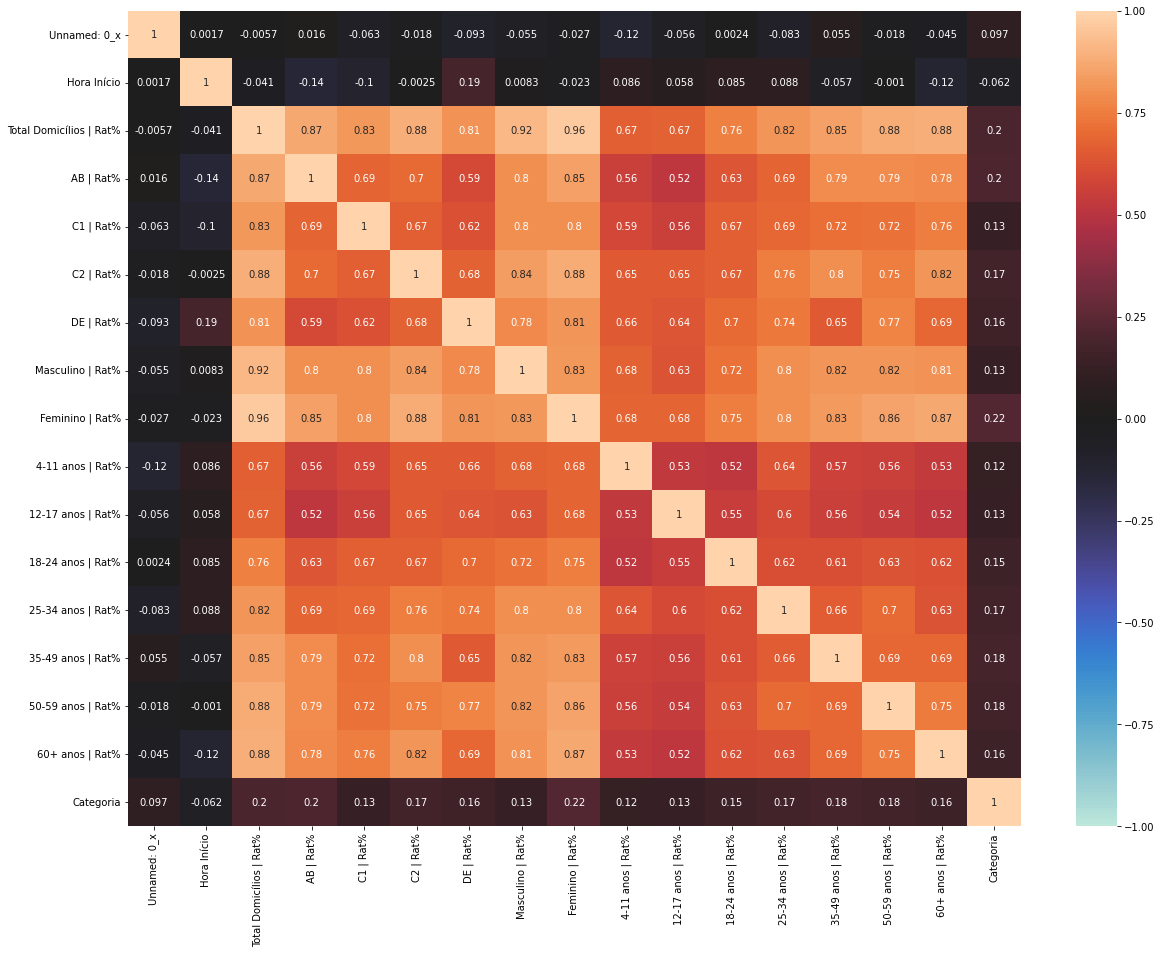

In [ ]:
## Definindo tamanho da figura
rcParams['figure.figsize'] = 20, 15
## Matriz de correlação
matriz_de_correlacao = clean_merged.corr()
## Mapa de calor
sns.heatmap(matriz_de_correlacao, annot=True, vmin=-1, vmax=1, center=0)
## Definindo a posição dos ticks nos eixos
plt.yticks(rotation=360)
plt.xticks(rotation=90)
## Mostrando a figura
plt.show()  


### RFE - Número ideal de features

In [ ]:
## Modelo Random Forest
from sklearn.ensemble import RandomForestRegressor as rf
## RFE
from sklearn.feature_selection import RFE
## Dividir em Treino e Teste
from sklearn.model_selection import train_test_split
## Modelo rf
modelo = rf()
# Número de Features Previsoras
lista=np.arange(1,8)
## Melhor score iniciando em 0
melhor_score=0
## Variável para armazenar o número ótimo de features
nf=0           
## Lista vazia dos scores
lista_score =[]
## Loop
for i in range(len(lista)):
    ## Divisão treino e teste
    X_treino, X_teste, Y_treino, Y_teste = train_test_split('Hora início', 'Total Domicílios | Rat%', test_size = 0.3, random_state = 0)
    ## RF
    modelo = rf()
    ## RFE
    rfe = RFE(modelo,lista[i])
    ## Fit transform no treino 
    X_treino_rfe = rfe.fit_transform(X_treino,Y_treino)
    X_teste_rfe = rfe.transform(X_teste)
    ## Treinando com X_treino_rfe e Y_treino
    modelo.fit(X_treino_rfe,Y_treino)
    ## Score do treinamento
    score = modelo.score(X_teste_rfe,Y_teste)
    ## Armazenando resultados na lista vazia
    lista_score.append(score)
    ## Observando o melhor score dentre todos e nº ideal de features
    if(score > melhor_score):
        melhor_score = score
        nf = lista[i]
print("Numero ideal de features: %d" %nf)
print("Score com %d features: %f" % (nf, melhor_score))

##Regressão Linear

In [ ]:
from sklearn.model_selection import train_test_split

x = clean_merged[['Hora Início', 'Dia da Semana', 'Categoria', 'Mes']]
y = clean_merged['Total Domicílios | Rat%']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Treinando o modelo
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

40.38389371035096

In [ ]:
mean_absolute_error(y_test, y_pred)

5.085907943012747

In [ ]:
r2_score(y_test, y_pred)

0.04298797068080562

##Dias da semana

In [ ]:
#Dicionario para mudar os dias da tabela em numeros
dict_dias = {'Domingo':1, 'Segunda':2, 'Terça':3, 'Quarta': 4, 'Quinta':5, 'Sexta':6, 'Sábado': 7}
#Muda os dias da semana por numeros na tabela correspondentes ao dicionario acima
clean_merged['Dia da Semana'] = clean_merged['Dia da Semana'].replace(dict_dias)
clean_merged.head()

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria,Feriado,Ano,Dia,Mes
0,0,2020-06-01,6.000000,2,4.27,2.40,0.31,0.82,5.23,1.65,...,3.19,1.98,5.81,1.61,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
1,1,2020-06-01,6.083333,2,4.89,3.02,0.51,1.08,5.23,1.89,...,3.19,2.86,5.81,2.38,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
2,2,2020-06-01,6.166667,2,5.74,3.13,1.53,1.22,5.23,1.97,...,3.19,3.52,5.81,2.62,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
3,3,2020-06-01,6.250000,2,6.55,3.06,1.86,1.48,6.46,1.92,...,3.19,4.05,6.65,3.10,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
4,4,2020-06-01,6.333333,2,7.27,3.49,2.18,1.48,6.46,2.23,...,3.19,4.82,6.90,3.10,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06


#Features 


In [ ]:
#Importando livrarias
import sklearn
from sklearn.preprocessing import StandardScaler
#cria uma lista com os dados que iremos usar 
entrada = ['Total Domicílios | Rat%', 'AB | Rat%', 'C1 | Rat%', 'C2 | Rat%',
       'DE | Rat%', 'Masculino | Rat%', 'Feminino | Rat%', '4-11 anos | Rat%',
       '12-17 anos | Rat%', '18-24 anos | Rat%', '25-34 anos | Rat%',
       '35-49 anos | Rat%', '50-59 anos | Rat%', '60+ anos | Rat%']
#criando uma variavel para referenciar os dados que iremos usar
entrada_uso = clean_merged[entrada]
#Convertendo os dados em forma de dataframe em listas numpy
scaler = StandardScaler()
scaled_data = scaler.fit_transform(entrada_uso)
entrada_uso_scaled = pd.DataFrame(scaled_data, columns = entrada_uso.columns)

In [ ]:
#Importa as bibliotecas
from sklearn.preprocessing import LabelEncoder
#cria uma lista com os dados que iremos usar
categorias = ['Data', 'Hora Início', 'Dia da Semana','Programa',
       'Categoria', 'Ano', 'Mes', 'Dia']
#Mapeamento dos valores 
le = LabelEncoder()
test = pd.get_dummies(clean_merged['Categorias'], drop_first=True)
test

KeyError: ignored

###Arredondando valores de RAT%

In [ ]:
#arredondando valores de rat% para numeros inteiros
rounded_rat = clean_merged
rounded_rat['Total Domicílios | Rat%'] = rounded_rat['Total Domicílios | Rat%'].round(0)
rounded_rat

,Unnamed: 0_x,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria,Feriado,Ano,Dia,Mes
0,0,2020-06-01,6.000000,2,4.0,2.40,0.31,0.82,5.23,1.65,...,3.19,1.98,5.81,1.61,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
1,1,2020-06-01,6.083333,2,5.0,3.02,0.51,1.08,5.23,1.89,...,3.19,2.86,5.81,2.38,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
2,2,2020-06-01,6.166667,2,6.0,3.13,1.53,1.22,5.23,1.97,...,3.19,3.52,5.81,2.62,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
3,3,2020-06-01,6.250000,2,7.0,3.06,1.86,1.48,6.46,1.92,...,3.19,4.05,6.65,3.10,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
4,4,2020-06-01,6.333333,2,7.0,3.49,2.18,1.48,6.46,2.23,...,3.19,4.82,6.90,3.10,BOM DIA ESPIRITO SANTO,14,NaN,2020,01,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218875,31099,2022-06-26,29.583333,1,3.0,1.42,0.00,2.06,0.89,0.63,...,0.00,2.50,1.53,2.97,HORA UM,14,NaN,2022,26,06
218876,31100,2022-06-26,29.666667,1,3.0,1.42,0.00,1.93,0.89,0.80,...,0.00,2.50,2.23,2.15,HORA UM,14,NaN,2022,26,06
218877,31101,2022-06-26,29.750000,1,4.0,1.90,0.00,2.29,0.89,1.14,...,0.00,2.50,2.23,2.15,HORA UM,14,NaN,2022,26,06
218878,31102,2022-06-26,29.833333,1,4.0,1.78,0.52,2.53,0.89,1.28,...,0.62,2.50,2.23,2.15,HORA UM,14,NaN,2022,26,06


#Análises estatísticas

### Gerar gráficos

In [ ]:
#grafico de distribuição de cada valor de audiencia já arredondado
frequencia_audiencia = rounded_rat.groupby('Total Domicílios | Rat%').count()
plt.plot(frequencia_audiencia['Unnamed: 0_x'])
frequencia_audiencia.sum()['Unnamed: 0_x']

In [ ]:
#graficos de frequencias de valores de audiencia

#lista com as categorias:
catData = rounded_rat.groupby("Categoria").all()
count=0

#para cada valor da lista (cada categoria), é gerado um grafico de distribuíção dos valores de audiencia
for i in list(catData.index.values):
  count+=1
  a = rounded_rat[rounded_rat.Categoria == i].groupby('Total Domicílios | Rat%').count()
  print(i)
  plt.figure(count+5, figsize=(10, 7))
  
  plt.plot(a['Unnamed: 0_x'], label = i)
  plt.xlabel("Total Domicilios \ Rat%")
  plt.ylabel("Frequencia")
  plt.legend(loc ='best')
  print(a['Unnamed: 0_x'])
  tot = a['Unnamed: 0_x'].sum()
  print(tot)

  #tira outliers de frequencia (valores que se repetem em menos de 0.5% da amostra)
  for n in a['Unnamed: 0_x']:
    if n/tot <= 0.0005:
      print(str("n") + str(n))
      f = a[a['Unnamed: 0_x'] == n].index
      print(str('f =') + str(f))
      a.drop(f, axis = 0, inplace=True)

In [ ]:
#Tira a media da coluna categoria em relação ao rat total
generScore = clean_merged.groupby('Categoria').mean()['Total Domicílios | Rat%']
#faz um grafico de barras com as medias tiradas na linha acima
generScore.plot.bar()

###Moda dos horários pelos gêneros




In [ ]:
#mostra a moda dos horarios a partir das categorias 
#generHora = clean_merged.groupby('Categoria')['Hora Início'].agg(pd.Series.mode).to_frame()
#generHora

from google.colab import drive
drive.mount('/content/drive')



---



 

---



#Tabelas geradas pelo Sheets

##TV Globo

###TV Globo - seg a sex

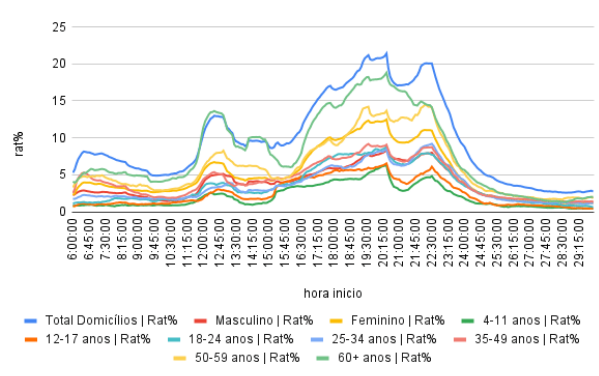

###TV Globo - seg

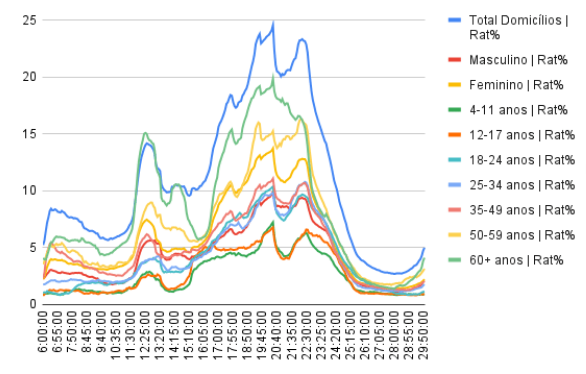

###TV Globo - Ter

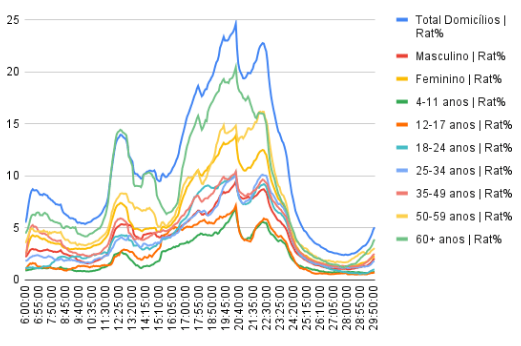

###TV Globo - Qua

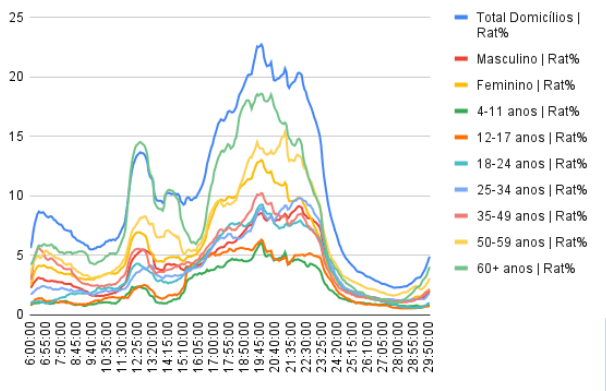

###TV Globo - qui

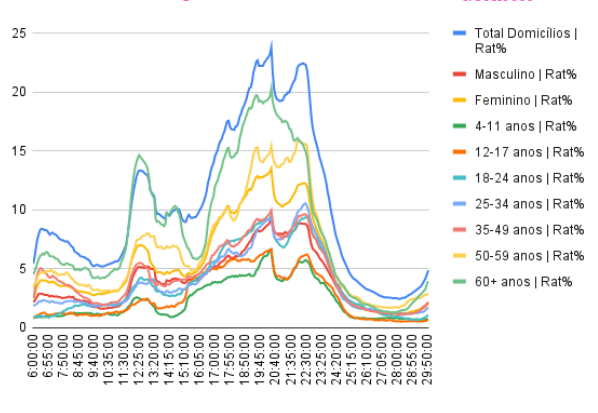

###TV Globo - sex

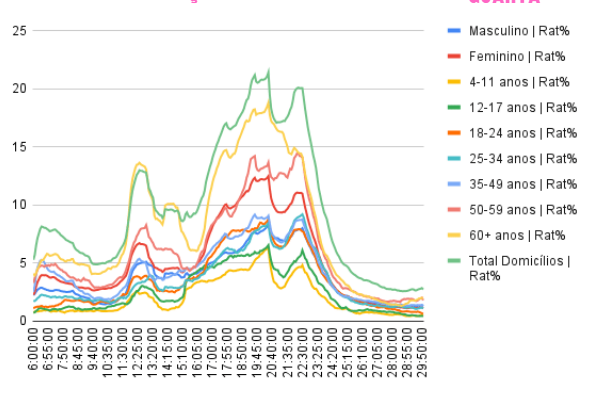

###TV Globo - *sab*

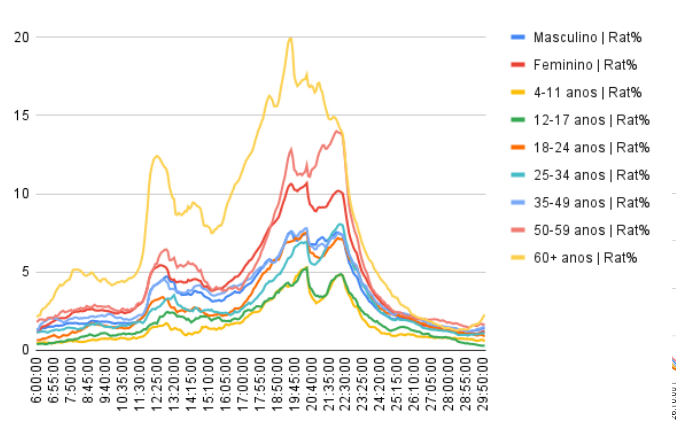

###TV Globo - dom

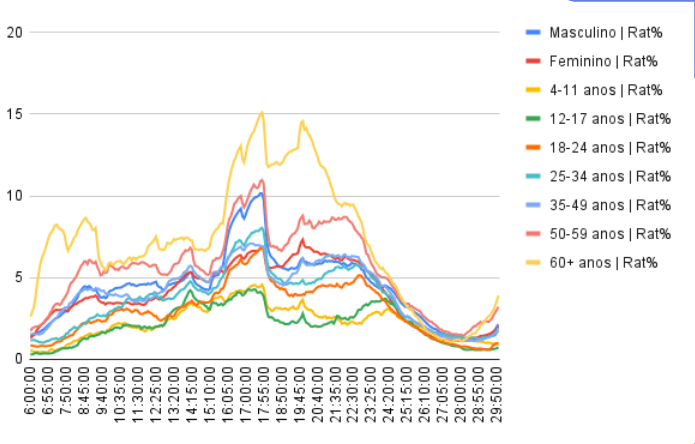

### TV Globo - Diária 

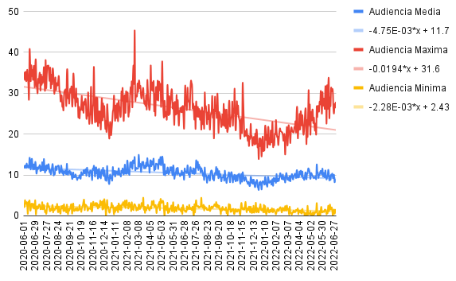

##TV Record - seg a sex

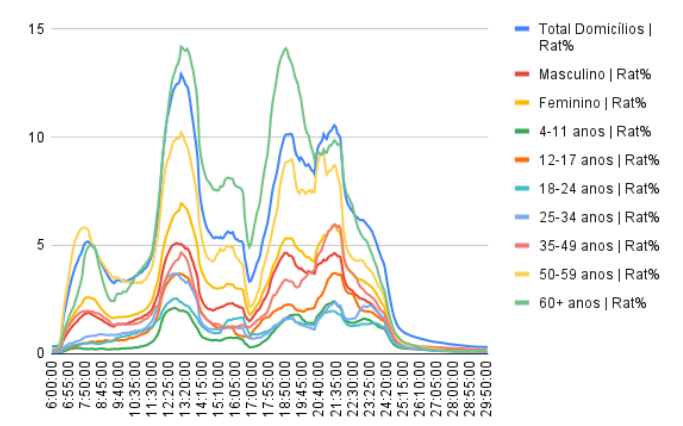

###TV Record - Sab

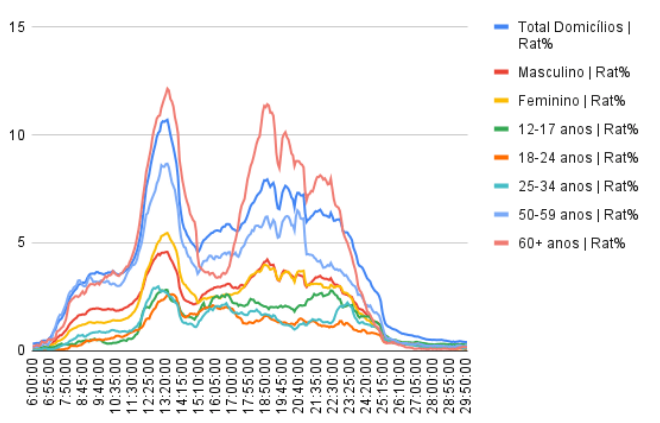

###TV Record - dom

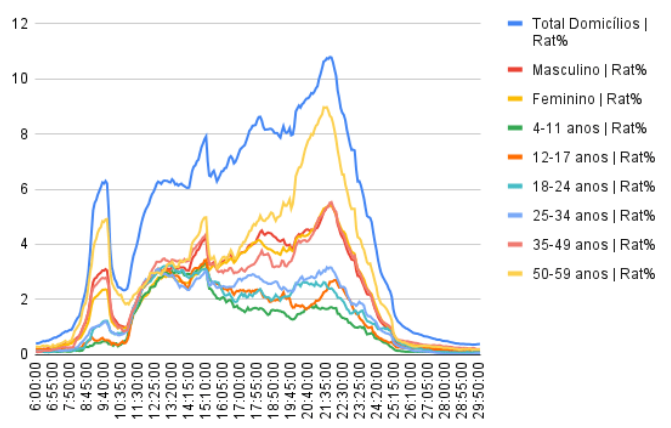

##TV SBT - seg a sex

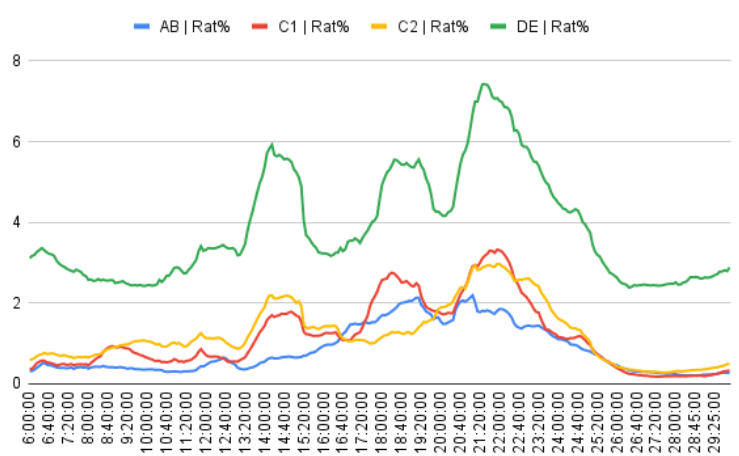

###TV SBT - sab

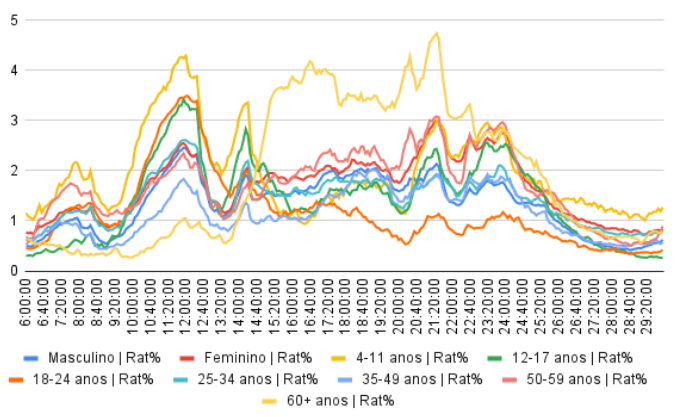

### TV SBT - dom

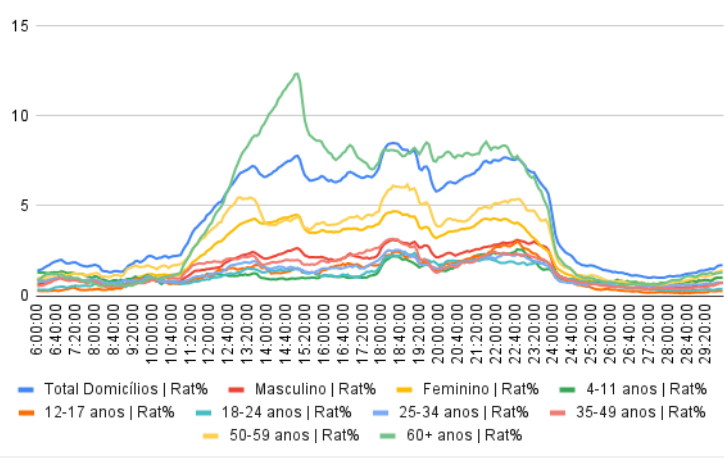

##Tendências das emissoras

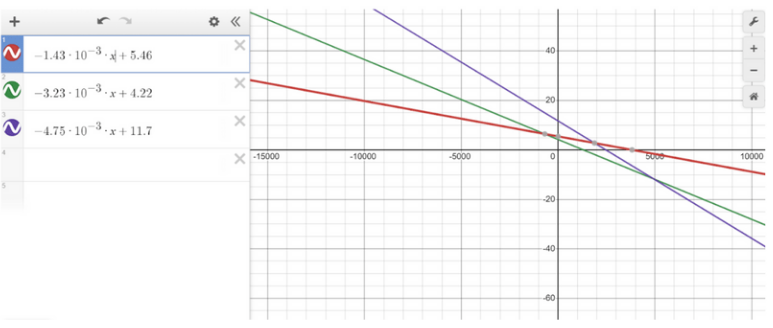

#ESTATÍSTICA - Básica

In [ ]:
#Médias das features numéricas usadas
mean_tot_RAT = clean_merged['Total Domicílios | Rat%'].mean()
mean_tot_RAT_AB = clean_merged['AB | Rat%'].mean()
mean_tot_RAT_C1 = clean_merged['C1 | Rat%'].mean()
mean_tot_RAT_C2 = clean_merged['C2 | Rat%'].mean()
mean_tot_RAT_DE = clean_merged['DE | Rat%'].mean()
mean_tot_RAT_Maculino = clean_merged['Masculino | Rat%'].mean()
mean_tot_RAT_Feminino = clean_merged['Feminino | Rat%'].mean()
mean_tot_RAT_4_11 = clean_merged['4-11 anos | Rat%'].mean()
mean_tot_RAT_12_17 = clean_merged['12-17 anos | Rat%'].mean()
mean_tot_RAT_18_24 = clean_merged['18-24 anos | Rat%'].mean()
mean_tot_RAT_25_34 = clean_merged['25-34 anos | Rat%'].mean()
mean_tot_RAT_35_49 = clean_merged['35-49 anos | Rat%'].mean()
mean_tot_RAT_50_59 = clean_merged['50-59 anos | Rat%'].mean()
mean_tot_RAT_60 = clean_merged['60+ anos | Rat%'].mean()

means = {'Total Domicílios | Rat%':[mean_tot_RAT],
         'AB | Rat%': [mean_tot_RAT_AB], 
         'C1 | Rat%': [mean_tot_RAT_C1], 
         'C2 | Rat%': [mean_tot_RAT_C2], 
         'DE | Rat%': [mean_tot_RAT_DE], 
         'Masculino | Rat%': [mean_tot_RAT_Maculino], 
         'Feminino | Rat%': [mean_tot_RAT_Feminino], 
         '4-11 anos | Rat%' :[mean_tot_RAT_4_11], 
         '12-17 anos | Rat%': [mean_tot_RAT_12_17], 
         '18-24 anos | Rat%': [mean_tot_RAT_18_24], 
         '25-34 anos | Rat%': [mean_tot_RAT_25_34], 
         '35-49 anos | Rat%': [mean_tot_RAT_35_49], 
         '50-59 anos | Rat%': [mean_tot_RAT_50_59], 
         '60+ anos | Rat%':[mean_tot_RAT_60]}
df_means = pd.DataFrame(means)
df_means

,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%
0,9.922615,4.034766,3.65827,5.16845,6.046669,4.031604,5.145247,2.229763,2.510125,3.631962,3.773114,4.409006,6.186748,8.103212


In [ ]:
#Desvio padrão das features
std_tot_RAT = clean_merged['Total Domicílios | Rat%'].std()
std_tot_RAT_AB = clean_merged['AB | Rat%'].std()
std_tot_RAT_C1 = clean_merged['C1 | Rat%'].std()
std_tot_RAT_C2 = clean_merged['C2 | Rat%'].std()
std_tot_RAT_DE = clean_merged['DE | Rat%'].std()
std_tot_RAT_Maculino = clean_merged['Masculino | Rat%'].std()
std_tot_RAT_Feminino = clean_merged['Feminino | Rat%'].std()
std_tot_RAT_4_11 = clean_merged['4-11 anos | Rat%'].std()
std_tot_RAT_12_17 = clean_merged['12-17 anos | Rat%'].std()
std_tot_RAT_18_24 = clean_merged['18-24 anos | Rat%'].std()
std_tot_RAT_25_34 = clean_merged['25-34 anos | Rat%'].std()
std_tot_RAT_35_49 = clean_merged['35-49 anos | Rat%'].std()
std_tot_RAT_50_59 = clean_merged['50-59 anos | Rat%'].std()
std_tot_RAT_60 = clean_merged['60+ anos | Rat%'].std()

stds = {'Total Domicílios | Rat%':[std_tot_RAT],
         'AB | Rat%': [std_tot_RAT_AB], 
         'C1 | Rat%': [std_tot_RAT_C1], 
         'C2 | Rat%': [std_tot_RAT_C2], 
         'DE | Rat%': [std_tot_RAT_DE], 
         'Masculino | Rat%': [std_tot_RAT_Maculino], 
         'Feminino | Rat%': [std_tot_RAT_Feminino], 
         '4-11 anos | Rat%' :[std_tot_RAT_4_11], 
         '12-17 anos | Rat%': [std_tot_RAT_12_17], 
         '18-24 anos | Rat%': [std_tot_RAT_18_24], 
         '25-34 anos | Rat%': [std_tot_RAT_25_34], 
         '35-49 anos | Rat%': [std_tot_RAT_35_49], 
         '50-59 anos | Rat%': [std_tot_RAT_50_59], 
         '60+ anos | Rat%':[std_tot_RAT_60]}
df_stds = pd.DataFrame(stds)
df_stds

,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%
0,6.520884,2.903602,3.151994,4.207737,4.985269,2.785044,3.808778,2.499678,2.909039,3.639758,3.349939,3.095653,4.892827,6.032954
